In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Building ARIMA Models
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt

# Libraries for Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
%matplotlib inline

In [103]:
df = pd.read_csv('./ENX.csv', header=0, index_col=0)
# df = df.drop(['Volume','Adj Close'], axis=1)
df.head()

,Close,Volume,EMA10,EMA50,EMA100,ROC12,ROC24,Name,AUD,CAD,...,USD,JPY,JPXGY,NASDAQ,NIKKEI,NYSE,SSE,GOLD,OIL,SILVER
Date,,,,,,,,,,,,,,,,,,,,,
6/9/2015,28.95,140255,NaN,NaN,NaN,NaN,NaN,ENX,1.30,1.24,...,95.17,124.56,7.65,5013.87,20096.30,10915.64,5113.53,1177.6,60.14,15.96
6/10/2015,28.92,245288,NaN,NaN,NaN,NaN,NaN,ENX,1.30,1.23,...,94.65,124.34,7.40,5076.69,20046.36,11057.99,5106.04,1186.6,61.43,15.96
6/11/2015,29.57,134151,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.98,122.87,7.45,5082.51,20382.97,11080.51,5121.59,1180.4,60.77,15.96
6/12/2015,28.47,90877,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.97,123.58,7.42,5051.10,20407.08,11009.91,5166.35,1179.2,59.96,15.83
6/15/2015,28.12,89958,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.81,123.29,7.56,5029.97,20387.79,10949.54,5062.99,1185.8,59.52,16.08


In [ ]:
df.info()

In [ ]:
df.plot(figsize=(16,6),lw=1)
plt.title('Stock market dataset from 2015~2023')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [180]:
df_ENX = pd.read_csv('./ENX.csv', header=0, index_col=0)
df_ENX.head()

,Close,Volume,EMA10,EMA50,EMA100,ROC12,ROC24,Name,AUD,CAD,...,USD,JPY,JPXGY,NASDAQ,NIKKEI,NYSE,SSE,GOLD,OIL,SILVER
Date,,,,,,,,,,,,,,,,,,,,,
6/9/2015,28.95,140255,NaN,NaN,NaN,NaN,NaN,ENX,1.30,1.24,...,95.17,124.56,7.65,5013.87,20096.30,10915.64,5113.53,1177.6,60.14,15.96
6/10/2015,28.92,245288,NaN,NaN,NaN,NaN,NaN,ENX,1.30,1.23,...,94.65,124.34,7.40,5076.69,20046.36,11057.99,5106.04,1186.6,61.43,15.96
6/11/2015,29.57,134151,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.98,122.87,7.45,5082.51,20382.97,11080.51,5121.59,1180.4,60.77,15.96
6/12/2015,28.47,90877,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.97,123.58,7.42,5051.10,20407.08,11009.91,5166.35,1179.2,59.96,15.83
6/15/2015,28.12,89958,NaN,NaN,NaN,NaN,NaN,ENX,1.29,1.23,...,94.81,123.29,7.56,5029.97,20387.79,10949.54,5062.99,1185.8,59.52,16.08


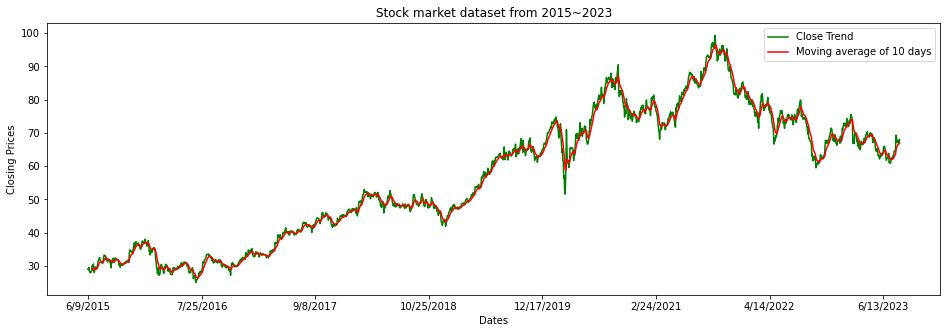

In [181]:
plt.figure(figsize=(16,5))
plt.grid(True)
df_ENX["Close"].plot(color='green', label='Close Trend')
df_ENX["EMA10"].plot(color='red', label='Moving average of 10 days')
plt.title('Stock market dataset from 2015~2023')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
# df_ENX["Residual"].plot()
plt.show()

In [182]:
df_ENX.describe()

,Close,Volume,EMA10,EMA50,EMA100,ROC12,ROC24,AUD,CAD,EUR,...,USD,JPY,JPXGY,NASDAQ,NIKKEI,NYSE,SSE,GOLD,OIL,SILVER
count,1787.000000,1.787000e+03,1778.000000,1738.000000,1688.000000,1776.000000,1764.000000,1787.000000,1787.000000,1787.000000,...,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,56.886514,1.345525e+05,56.932425,57.139514,57.375307,-0.371139,-0.715127,1.385490,1.308808,1.126010,...,97.119306,115.025434,8.910369,9004.687778,23094.139155,13140.700050,3188.615422,1512.347398,59.843570,19.143587
std,19.114732,1.587883e+05,19.040523,18.817623,18.560584,5.597650,8.072321,0.078911,0.042187,0.054208,...,4.554272,10.790262,1.764288,3324.423894,4245.679887,2109.599626,311.695511,291.860156,18.441608,4.030931
min,25.010000,9.589000e+03,26.340071,28.233096,29.219742,-21.194988,-25.119760,1.230000,1.200000,0.960000,...,88.670000,99.910000,5.450000,4363.140000,14952.020000,8777.380000,2483.090000,1049.600000,-37.630000,11.770000
25%,40.160000,8.438750e+04,40.168297,40.692722,41.295168,-4.060477,-6.314839,1.320000,1.280000,1.090000,...,93.940000,108.475000,7.665000,6209.055000,19909.380000,11505.255000,2977.445000,1258.050000,47.090000,15.980000
50%,59.510000,1.134000e+05,60.187404,60.458258,59.832583,-0.822718,-1.268218,1.380000,1.310000,1.120000,...,96.670000,111.120000,8.500000,7953.880000,22396.990000,12766.650000,3198.840000,1400.500000,56.870000,17.590000
75%,73.175000,1.551485e+05,73.250157,74.485513,75.477946,2.666626,3.663957,1.440000,1.330000,1.170000,...,99.265000,118.160000,9.450000,11831.700000,27231.175000,15081.255000,3370.410000,1803.900000,70.590000,23.100000
max,99.340000,5.254711e+06,96.542460,92.888184,89.802120,39.499709,43.746364,1.740000,1.460000,1.250000,...,114.110000,150.180000,14.160000,16057.440000,33753.330000,17353.760000,5166.350000,2069.400000,123.700000,29.420000


In [183]:
# Convert index to datetime64
df_ENX.index = pd.to_datetime(df_ENX.index)
start = df_ENX.index.min()
end = df_ENX.index.max()
print('Start date: ', start)
print('End date: ', end)

Start date:  2015-06-09 00:00:00
End date:  2023-08-10 00:00:00


<class 'pandas.core.series.Series'>
DatetimeIndex: 1787 entries, 2015-06-09 to 2023-08-10
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1787 non-null   float64
dtypes: float64(1)
memory usage: 27.9 KB


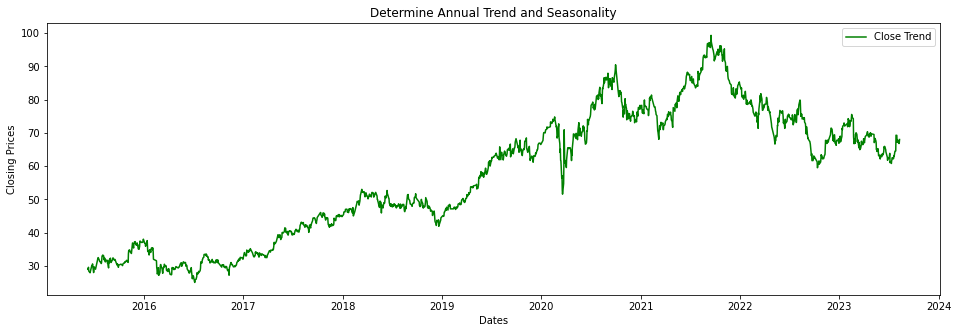

In [184]:
# Select close column for fitting the model
df_close = df_ENX["Close"]
df_close.info()

# Observe Close dataset
plt.figure(figsize=(16,5))
# plt.grid(True)
plt.tight_layout()
plt.title('Determine Annual Trend and Seasonality')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Close Trend')
plt.legend()
plt.show()

In [185]:
# Check index data type of datetime64
print(type(df_close.index))
print(df_close.index.inferred_type == "datetime64")
df_close.dropna(inplace=True)
df_close.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
True


Date
2015-06-09    28.95
2015-06-10    28.92
2015-06-11    29.57
2015-06-12    28.47
2015-06-15    28.12
Name: Close, dtype: float64

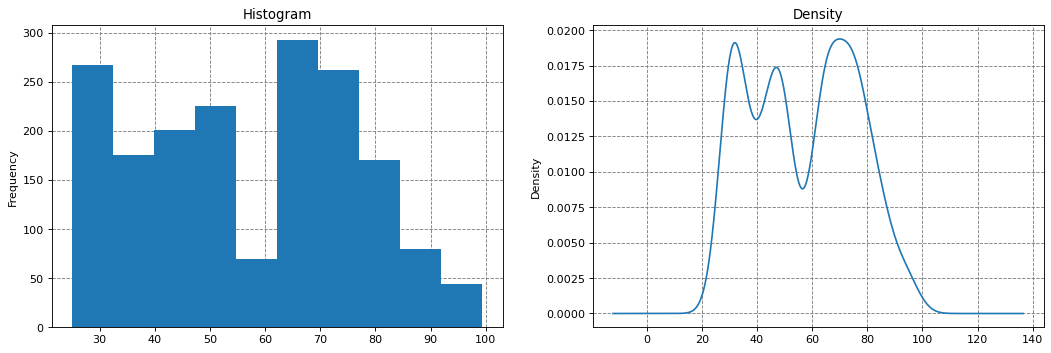

In [186]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
df_close.plot(title='Histogram', kind='hist', ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
df_close.plot(title='Density', kind='kde', ax=ax2)
ax2.grid(color='gray', linestyle='dashed')
plt.show()

In [187]:
df_close.skew() 

0.05179087773297612

In [188]:
# Split the data for train and test
row_len = int(len(df_close)*0.8)
df_train = list(df_close[0:row_len].copy())
df_test = list(df_close[row_len:].copy())

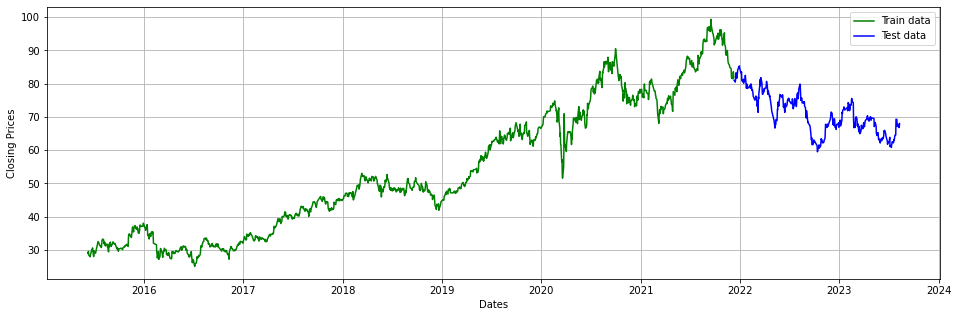

In [189]:
# Plot training and testing data
plt.figure(figsize=(16,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close[0:row_len], 'green', label='Train data')
plt.plot(df_close[row_len:], 'blue', label='Test data')
plt.legend()
plt.show()

In [190]:
# Perform differencing
def to_stationary(df):
    cycle = 0
    df_diff = df.diff().dropna()
    cycle += 1
    if df_diff[1] <= 0.05:
        print(f"p.value: {df_diff[1]}")
        print(f"Cycle of differencing: {cycle}")
        return df_diff
    else:
        return to_stationary(df_diff)

p.value: -1.75
Cycle of differencing: 1


<AxesSubplot:title={'center':'Close Trend After Differencing'}, xlabel='Date'>

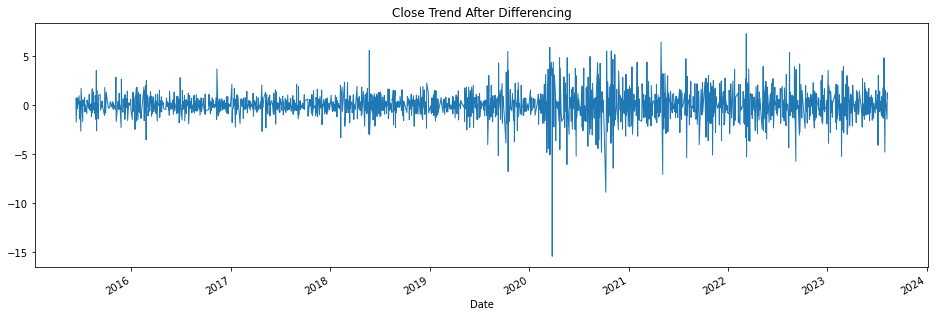

In [191]:
df_ts_diff = to_stationary(df_close)
df_ts_diff.plot(figsize=(16,5), lw=1, title="Close Trend After Differencing")

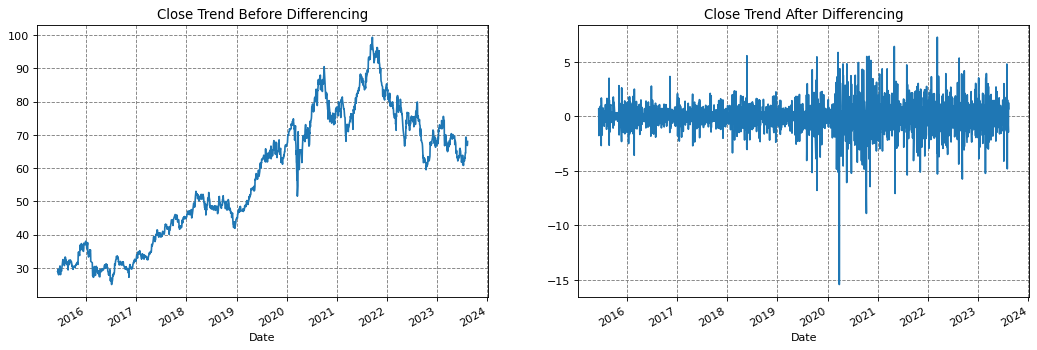

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
df_close.plot(title='Close Trend Before Differencing', ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
df_ts_diff.plot(title='Close Trend After Differencing', ax=ax2)
ax2.grid(color='gray', linestyle='dashed')
plt.show()

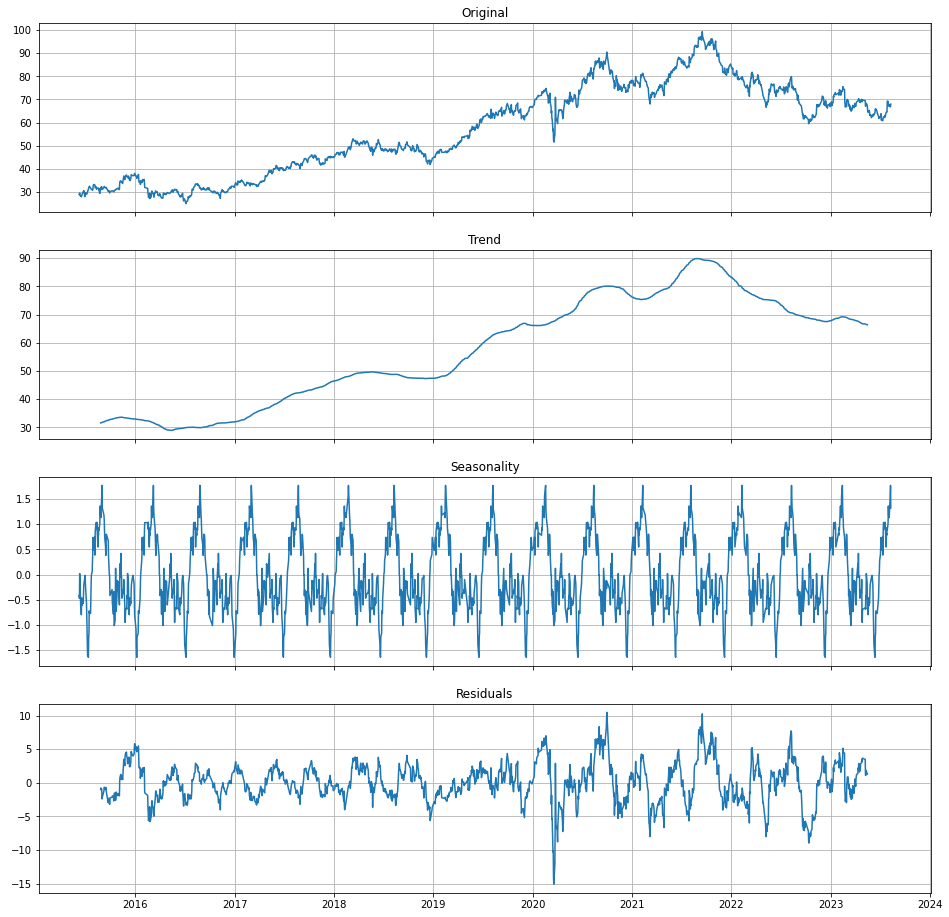

In [193]:
def decompose_ts(df, period):
    decomposition = smt.seasonal_decompose(df, period=period)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid   
    fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False, figsize=(16,16))
    ax[0].plot(df)
    ax[0].set_title('Original')
    ax[0].grid(True) 
    ax[1].plot(trend)
    ax[1].set_title('Trend')
    ax[1].grid(True)  
    ax[2].plot(seasonal)
    ax[2].set_title('Seasonality')
    ax[2].grid(True)  
    ax[3].plot(residual)
    ax[3].set_title('Residuals')
    ax[3].grid(True)
    
decompose_ts(df_close,9*12)

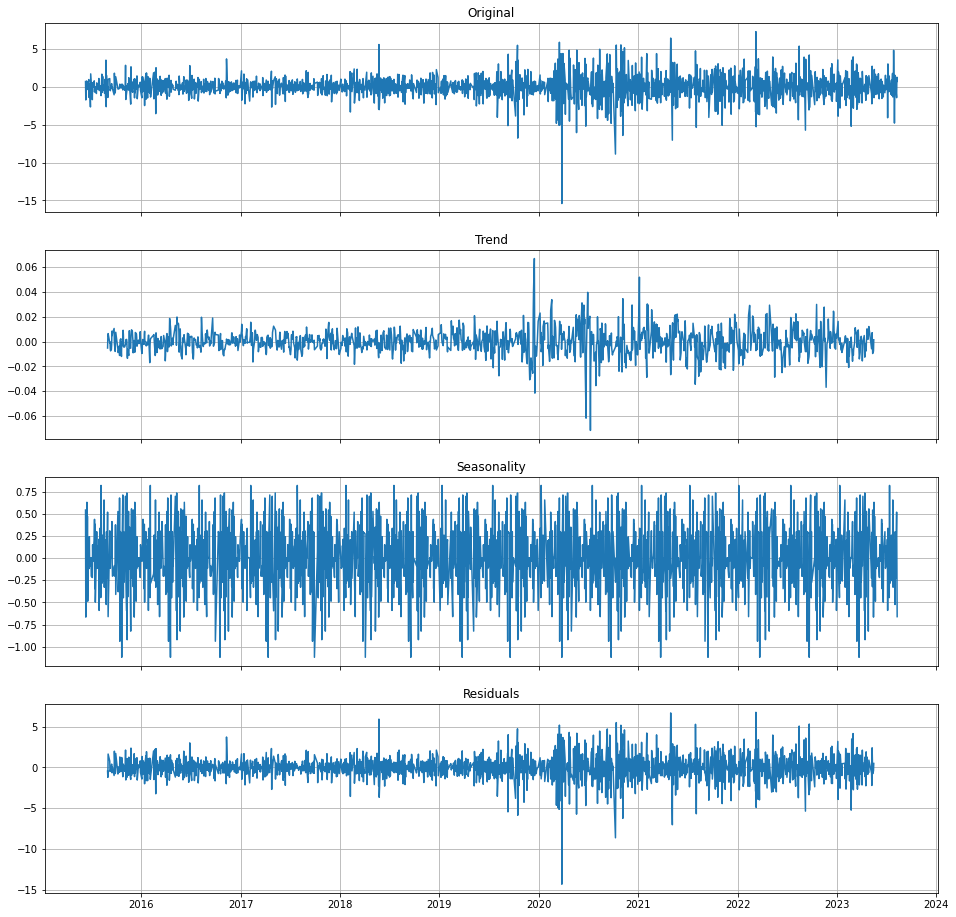

In [194]:
decompose_ts(df_ts_diff,9*12)

In [195]:
# Creating function to display ACF and PACF plot
def plot_correlation(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), dpi=80)
    # ACF
    plot_acf(df, ax=ax1, lags=20)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation ACF')
    
    # PACF
    plot_pacf(df, ax=ax2, lags=20)
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation PACF')

    # Lighten the borders
    ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
    ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
    ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
    ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

    ax1.tick_params(axis='both', labelsize=10)
    ax2.tick_params(axis='both', labelsize=10)
    plt.show()

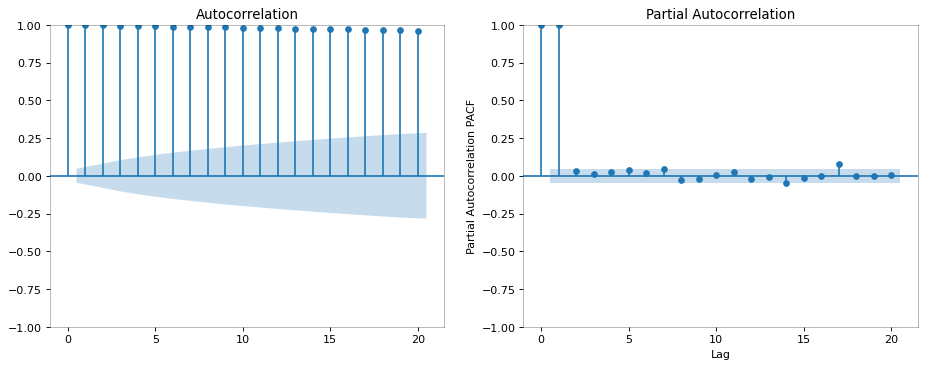

In [196]:
plot_correlation(df_close)

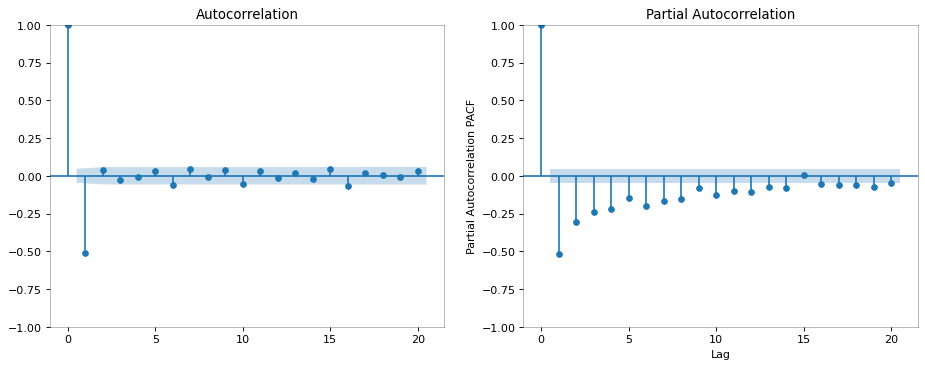

In [197]:
plot_correlation(df_ts_diff)

In [75]:
#perform augmented Dickey-Fuller test to check if stationary
def ADF(df):
    result = adfuller(df)

    # Extract ADF Values
    print('Column Name: %s' % "Close Variable")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [76]:
ADF(df_ts_diff)

Column Name: Close Variable
ADF Statistic: -14.603439
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Determine parameters

In [112]:
# library that determine best parameters for ARIMA model
import pmdarima as pm
from pmdarima import auto_arima

In [113]:
model = auto_arima(df_train, start_p=0, start_q=0,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0, 
                          max_P = 5, max_Q = 5,
                          seasonal=False,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4153.854, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4155.121, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4155.087, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4153.692, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4149.888, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4150.079, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4150.342, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4156.162, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4156.504, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4157.157, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4150.661, Time=0.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.583 seconds


In [198]:
# Function that extract model train according to given length
residuals = []
def model_fit(length):
    model_predictions = []
    
    for i in range(length):
        model = ARIMA(df_train, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        residuals.append(df_train[i] - yhat)
        model_predictions.append(yhat)
        actual_test_value = df_test[i]
        df_train.append(actual_test_value)

    print(len(model_predictions))
    print(model_fit.summary())
    
    return model_predictions

********************************************************************************

## Train Model Residuals

In [208]:
# Function that extract model train according to given length
train_residuals = []
def model_fit_train(length):
    model_predictions = []
    
    for i in range(length):
        model = ARIMA(df_train, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        train_residuals.append(df_train[i] - yhat)
        model_predictions.append(yhat)
        actual_test_value = df_train[i]
        df_train.append(actual_test_value)

    print(len(model_predictions))
    print(model_fit.summary())
    
    return model_predictions

In [209]:
# For model prediction for whole train set
n_train_observ = len(df_train)
model_train_predictionn = model_fit_train(n_train_observ)

1797
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3593
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6404.020
Date:                Wed, 04 Oct 2023   AIC                          12814.039
Time:                        14:37:09   BIC                          12832.599
Sample:                             0   HQIC                         12820.654
                               - 3593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9404      0.034     27.524      0.000       0.873       1.007
ma.L1         -0.9595      0.030    -32.017      0.000      -1.018      -0.901
sigma2         2.0706      0.007    293.648    

In [176]:
# pd.Series(sorted(date_range_1.union(date_range_2)))
train_ind = df_close.index
train_ind = train_ind.union(new_date)
train_ind

Index([2021-12-10 00:00:00, 2021-12-13 00:00:00, 2021-12-14 00:00:00,
       2021-12-15 00:00:00, 2021-12-16 00:00:00, 2021-12-17 00:00:00,
       2021-12-20 00:00:00, 2021-12-21 00:00:00, 2021-12-22 00:00:00,
       2021-12-23 00:00:00,
       ...
                '9/8/2016',          '9/8/2017',          '9/8/2021',
                '9/8/2022',          '9/9/2015',          '9/9/2016',
                '9/9/2019',          '9/9/2020',          '9/9/2021',
                '9/9/2022'],
      dtype='object', length=2155)

In [177]:
# Create dataframe for residuals
train_residuals = pd.DataFrame(train_residuals, columns=['Residual'])
train_residuals.index = train_ind
train_residuals.head()

ValueError: Length mismatch: Expected axis has 1429 elements, new values have 2155 elements

In [179]:
train_residuals.iloc[0] = train_residuals.mode()
train_residuals

ValueError: could not broadcast input array from shape (1429,1) into shape (1,)

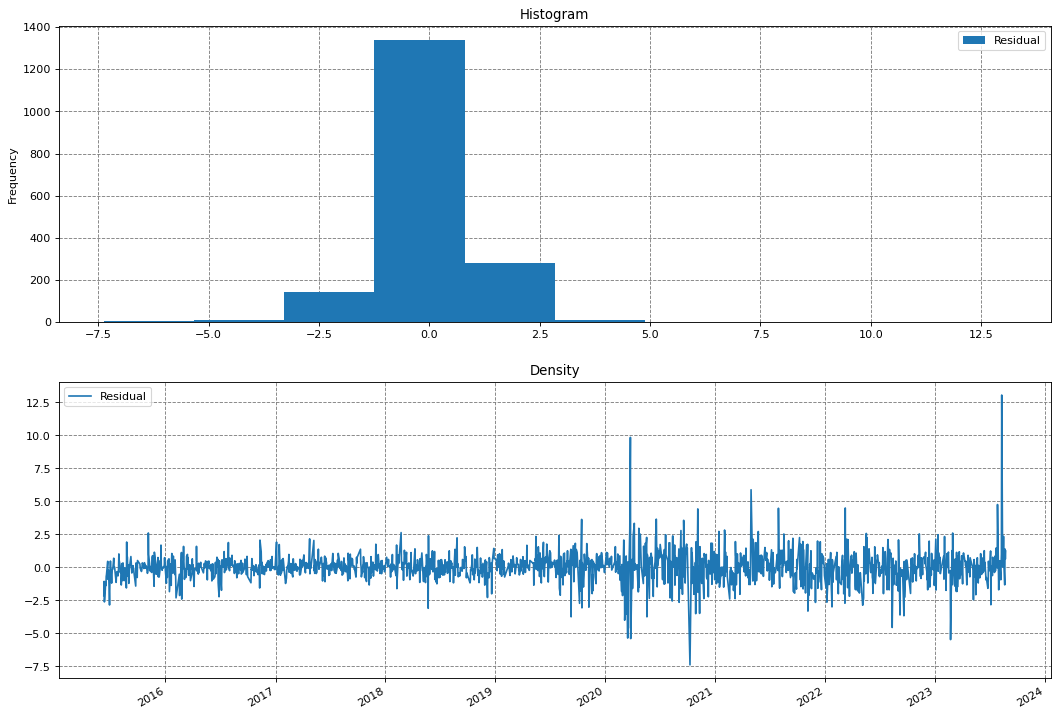

In [166]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12), dpi=80)
train_residuals.plot(title='Histogram', kind='hist', ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
train_residuals.plot(title='Density', kind='line', ax=ax2)
ax2.grid(color='gray', linestyle='dashed')
plt.show()

In [153]:
train_residuals.to_csv('./train_residuals2.csv')

**************************

## Model Summary

In [199]:
# For model prediction for whole train set
n_test_observ = len(df_test)
model_prediction = model_fit(n_test_observ)

358
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1786
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2643.688
Date:                Wed, 04 Oct 2023   AIC                           5293.375
Time:                        14:17:22   BIC                           5309.837
Sample:                             0   HQIC                          5299.455
                               - 1786                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7157      0.086      8.298      0.000       0.547       0.885
ma.L1         -0.7556      0.084     -8.951      0.000      -0.921      -0.590
sigma2         1.1323      0.018     62.560     

In [200]:
# For extended prediction using previous model prediction
extend_predict = model_fit(10)

10
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1796
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2730.257
Date:                Wed, 04 Oct 2023   AIC                           5466.514
Time:                        14:17:25   BIC                           5482.992
Sample:                             0   HQIC                          5472.597
                               - 1796                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6882      0.121      5.697      0.000       0.451       0.925
ma.L1         -0.7215      0.119     -6.068      0.000      -0.955      -0.488
sigma2         1.2265      0.014     90.596      

In [201]:
# Insert NAN at the beginning of new_predict dataset
for i in range(len(df_test)):
    extend_predict.insert(0, np.nan)
len(extend_predict)

368

In [202]:
# Adding NAN at the end of df_test and df_predictions
new_df_test = df_test.copy()
df_predictions = model_prediction.copy()
for i in range(10):
    new_df_test.append(np.nan)
    df_predictions.append(np.nan)
print(len(new_df_test))
print(len(df_predictions))

368
368


In [203]:
max_date = max(df_close[row_len:].index)

In [204]:
# Get date index of df_test using df_close
date_range = df_close[row_len:].index
# add 10 periods of date time array for 10 extended prediction
added_date = pd.date_range(max_date, periods=11, freq='B') 
# Combine two date range
new_date = date_range.union(added_date)
new_date

DatetimeIndex(['2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23',
               ...
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24'],
              dtype='datetime64[ns]', length=368, freq=None)

In [205]:
# Create dataframe for df_test and df_predictions
# pd.DataFrame(q_list, columns=['q_data'])
new_df_test = pd.DataFrame(new_df_test, columns=['Actual'])
new_df_test.index = new_date
df_predictions = pd.DataFrame(df_predictions, columns=['Predicted'])
df_predictions.index = new_date
extend_predict = pd.DataFrame(extend_predict, columns=['Extended'])
extend_predict.index = new_date

print(len(new_df_test))
print(len(df_predictions))
print(len(extend_predict))

368
368
368


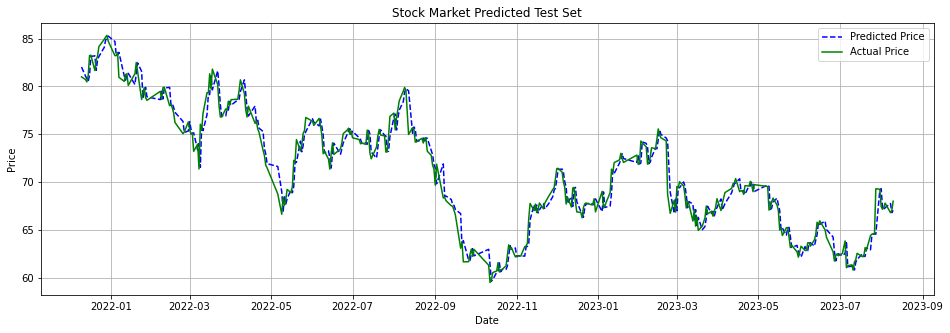

In [156]:
# Finally plotting all the dataset
plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(df_predictions, color = 'blue', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(new_df_test, color = 'green', label = 'Actual Price')
# plt.plot(extend_predict, color = 'red', linestyle = 'dashed', label = 'Extended Prediction')
plt.title('Stock Market Predicted Test Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [206]:
# Create dataframe for residuals
residuals = pd.DataFrame(residuals, columns=['Residual'])
residuals.index = new_date
residuals.head()

,Residual
2021-12-10,-53.071356
2021-12-13,-52.149351
2021-12-14,-51.213956
2021-12-15,-52.067875
2021-12-16,-53.039655


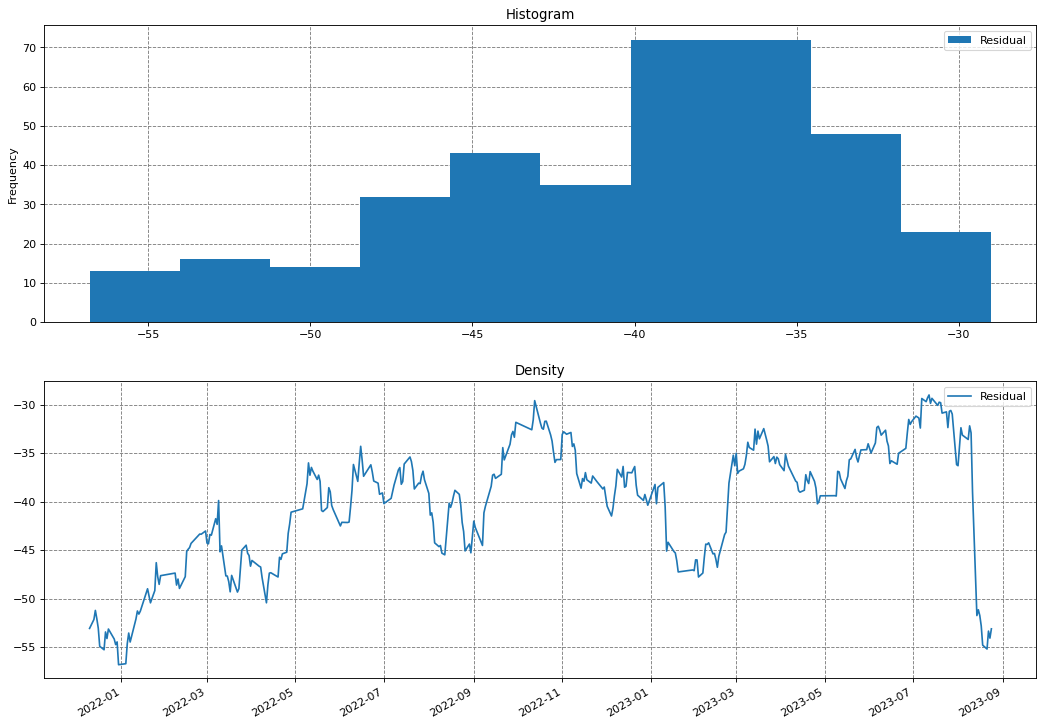

In [207]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12), dpi=80)
residuals.plot(title='Histogram', kind='hist', ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
residuals.plot(title='Density', kind='line', ax=ax2)
ax2.grid(color='gray', linestyle='dashed')
plt.show()

# residuals.plot(kind='hist')
# plt.grid(True)
# # plt.plot(residuals, color = 'orange', linestyle = 'dashed', label = 'Residual')
# plt.title('Model Residual')
# plt.xlabel('Date')
# plt.ylabel('Difference')
# plt.legend()
# plt.show()

In [ ]:
residuals.to_csv('./residuals2.csv')

In [90]:
# df_merged = df1.append(df2, ignore_index=True)
all_residuals = train_residuals.append(residuals)
all_residuals

AttributeError: 'NoneType' object has no attribute 'plot'

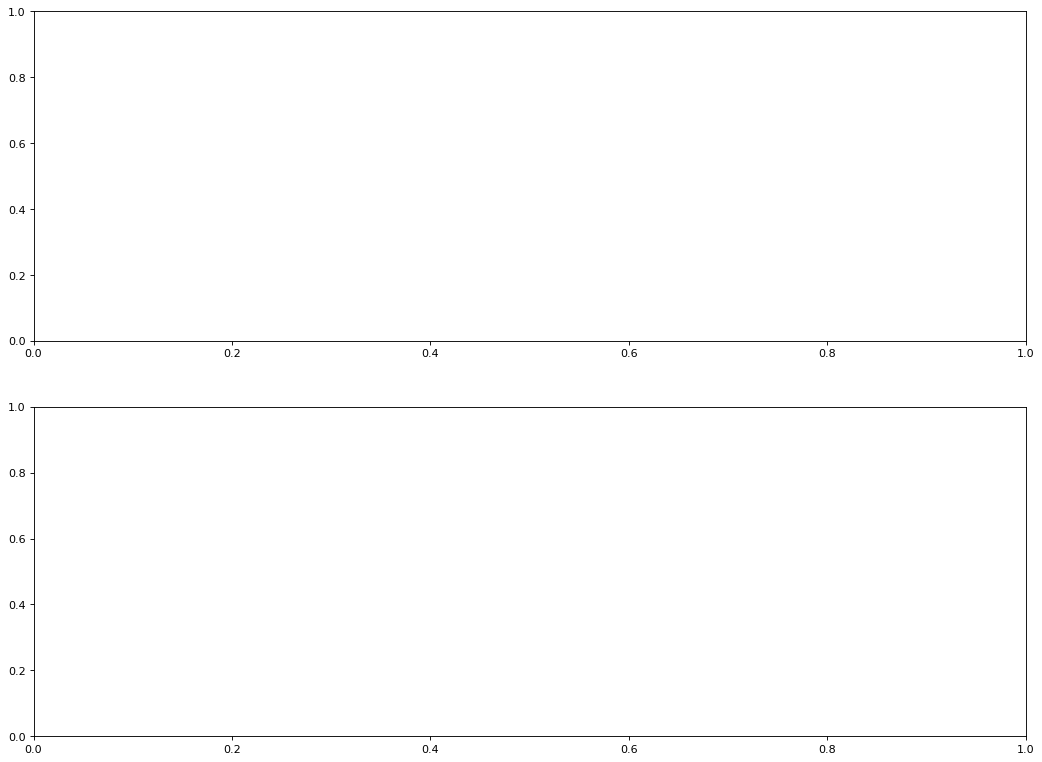

In [91]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12), dpi=80)
all_residuals.plot(title='Histogram', kind='hist', ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
all_residuals.plot(title='Density', kind='line', ax=ax2)
ax2.grid(color='gray', linestyle='dashed')
plt.show()

## Performance evaluation

In [137]:
# Calculate Mean Absolute Percentage Error using the created dataframes
mape = np.mean(np.abs(np.array(df_predictions) - np.array(new_df_test))/np.abs(new_df_test))
print(f'MAPE: ', mape)

MAPE:  Actual    0.012257
dtype: float64


In [138]:
# Calculate Mean squared error for the list of expected and predicted value
mse = mean_squared_error(df_test, model_prediction)
print('MSE: %f' % mse)

MSE: 1.388485


In [139]:
# Get root mean squared error
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1.178340
